<a href="https://colab.research.google.com/github/Pillalamarrivyshnavi/Ml-Models/blob/main/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/50_Startups.csv')

In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
dataset.shape

(50, 5)

In [ ]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


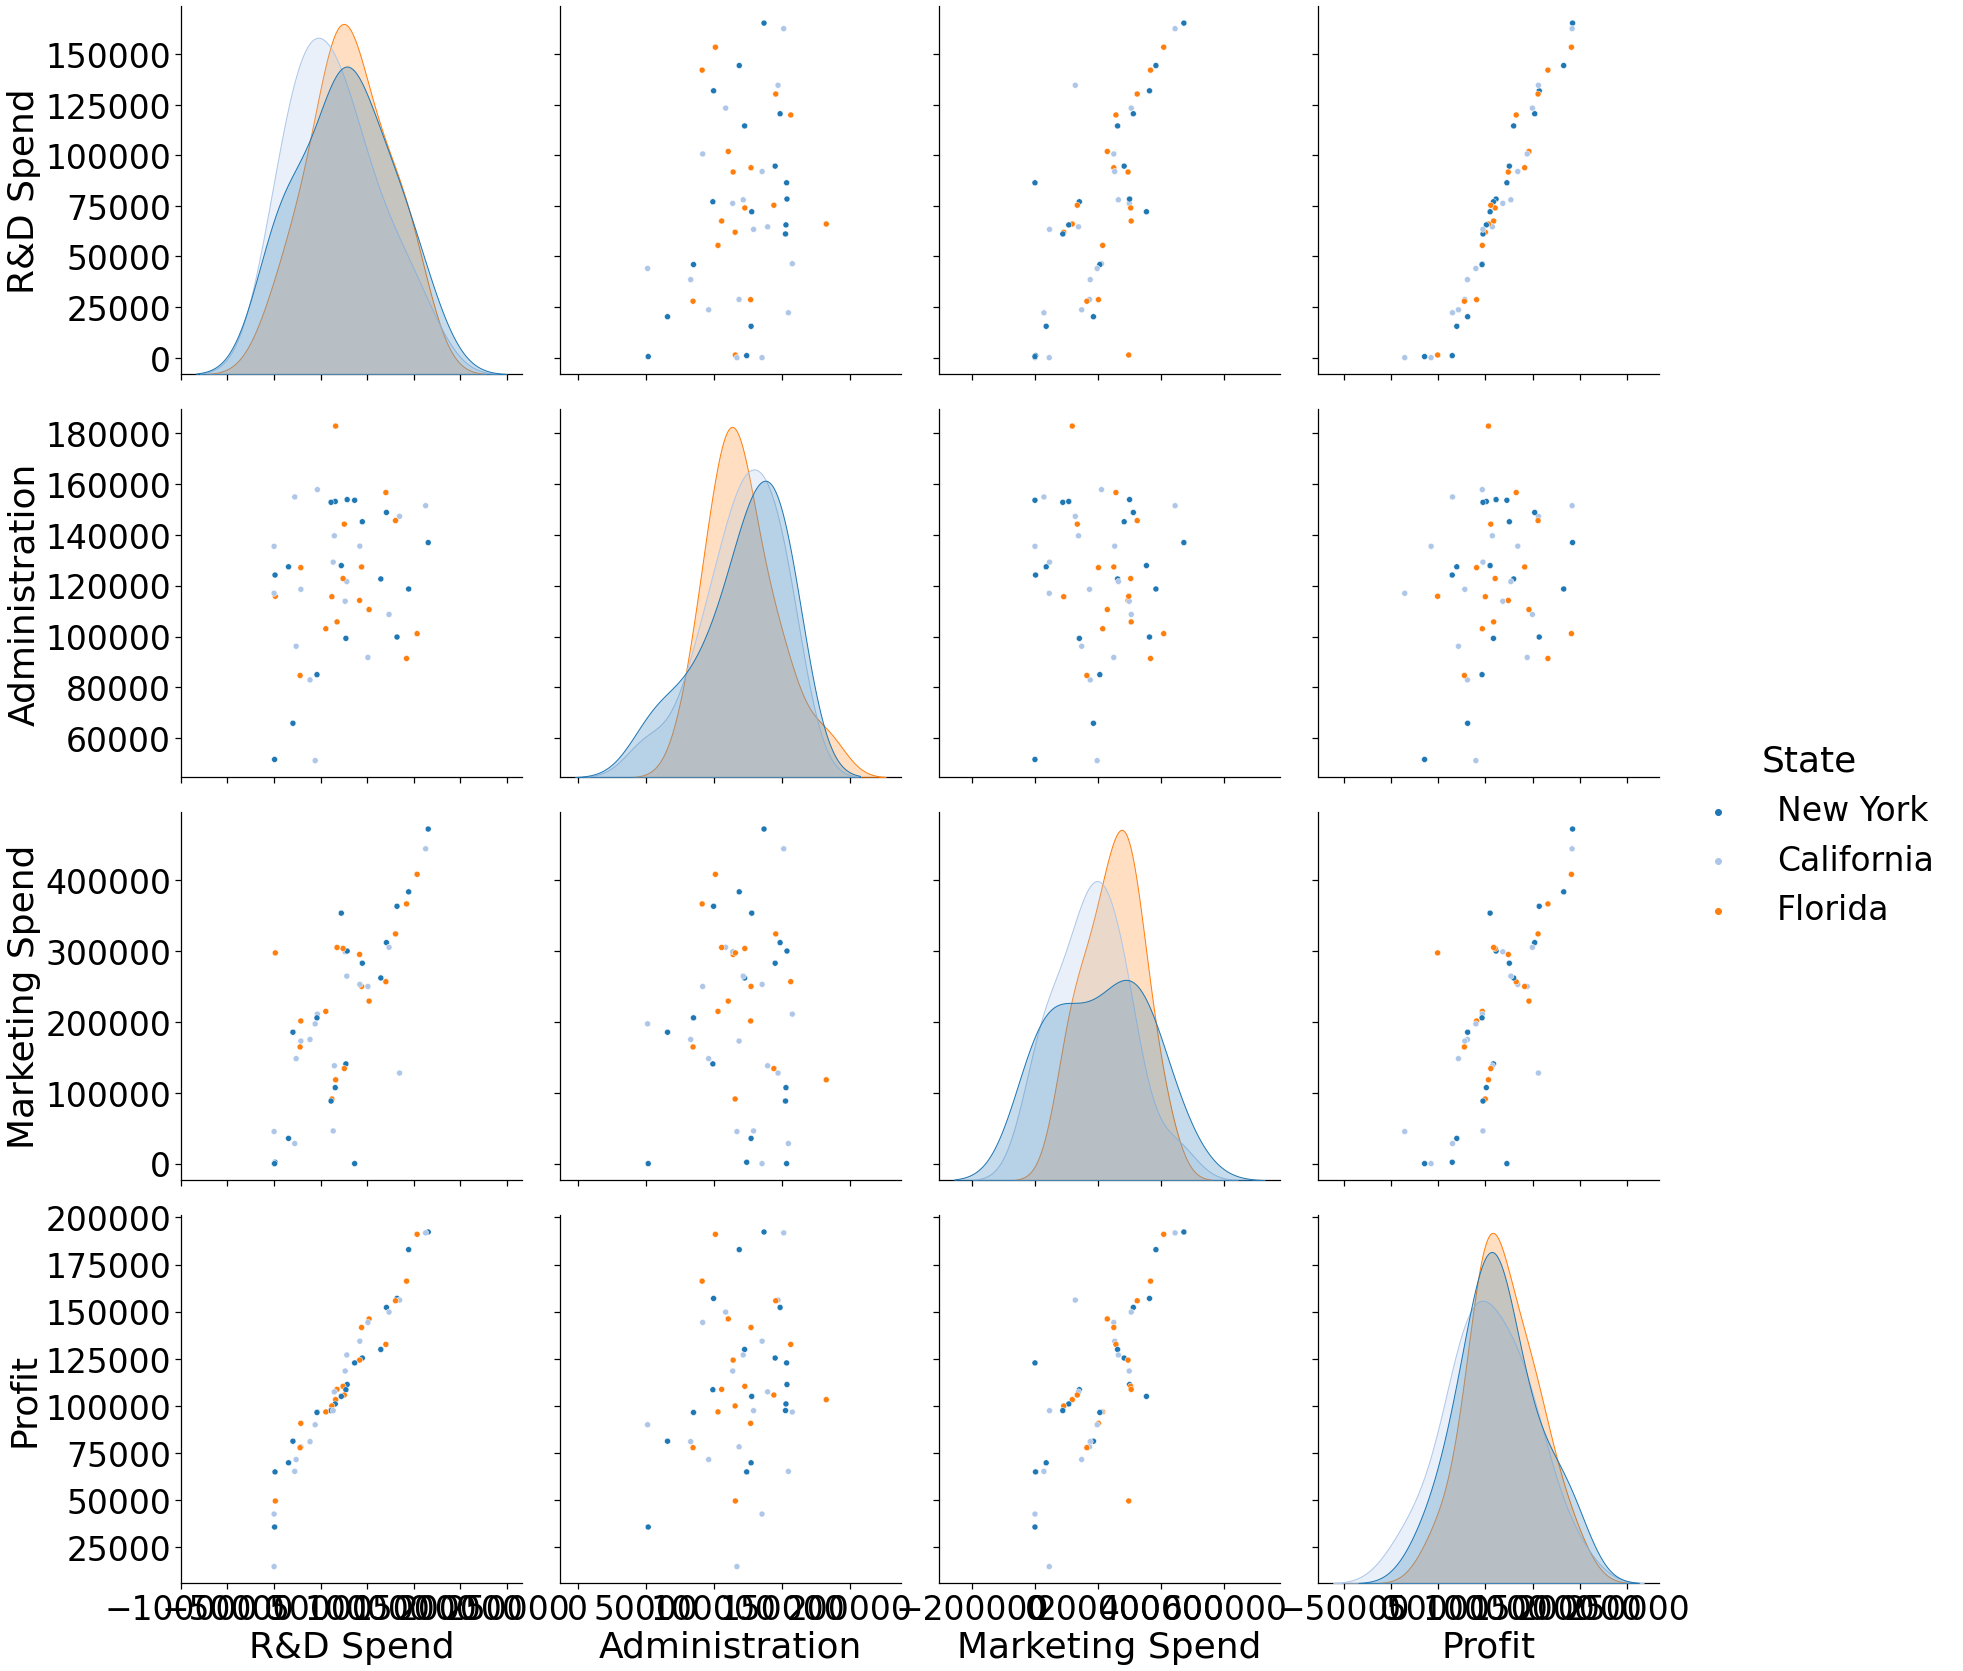

In [ ]:
#understandig the distribution with seaborn
with sns.plotting_context("notebook",font_scale=3.0):
  g=sns.pairplot(dataset[['R&D Spend','Administration','Marketing Spend','State','Profit']],
                 hue='State',palette='tab20',size=6)
  

In [ ]:
 
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1:].values

In [ ]:
print(x)

In [ ]:
print(y)

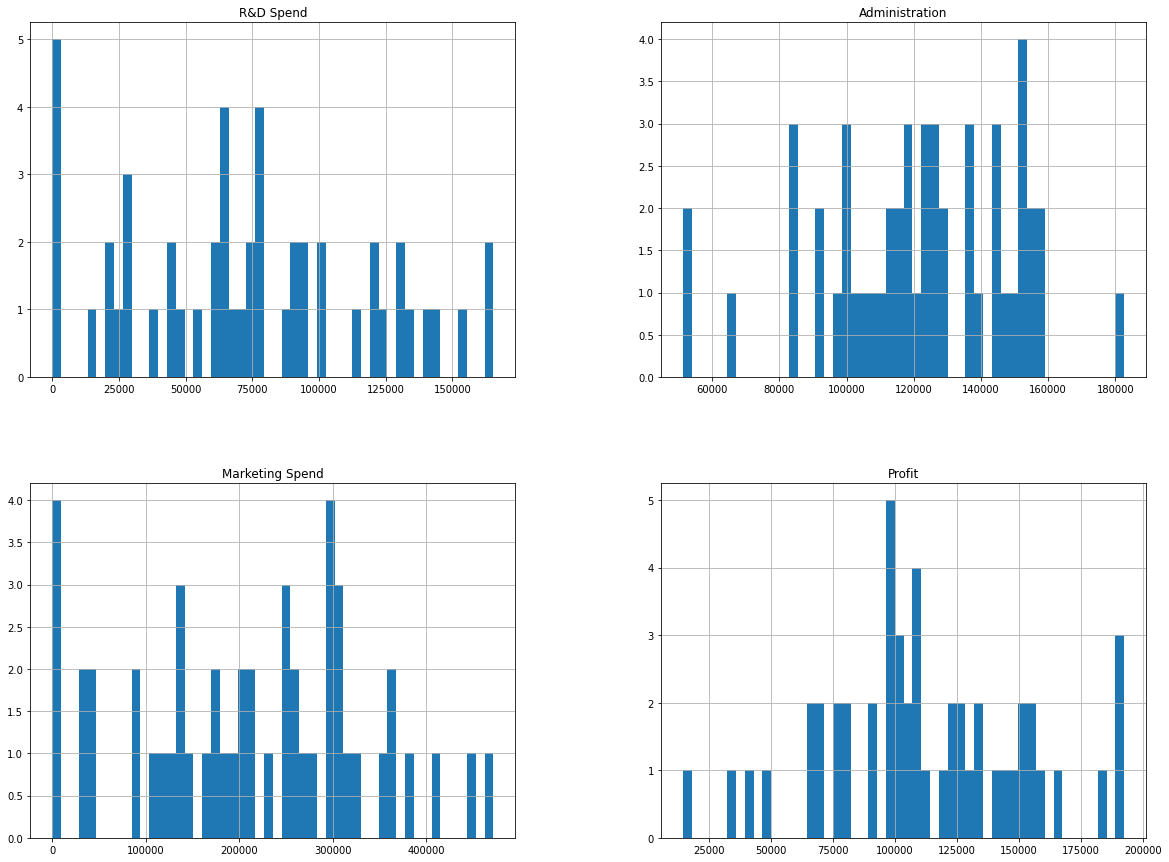

In [ ]:
%matplotlib inline
dataset.hist(bins=50,figsize=(20,15))
plt.show()


<AxesSubplot:>

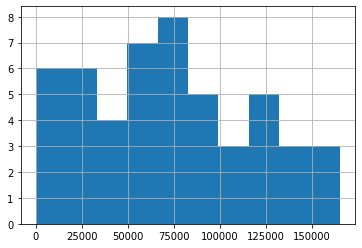

In [ ]:
dataset['R&D Spend'].hist()

<AxesSubplot:>

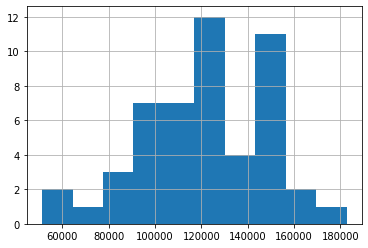

In [ ]:
dataset['Administration'].hist()

<AxesSubplot:>

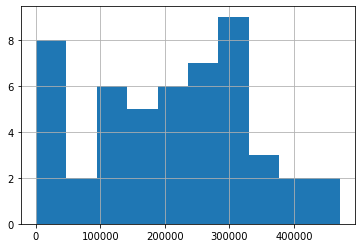

In [ ]:
dataset['Marketing Spend'].hist()

<AxesSubplot:>

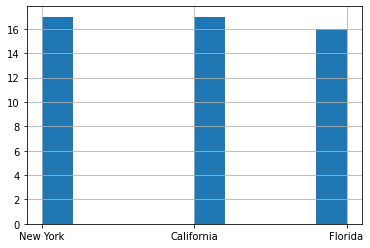

In [ ]:
dataset['State'].hist()

<AxesSubplot:>

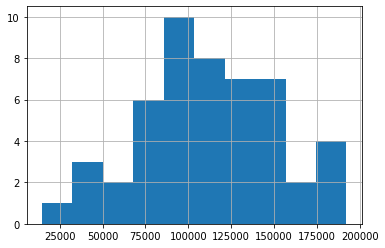

In [ ]:
dataset['Profit'].hist()

In [ ]:
#changing categorical to numerical var
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')#transforming col 3
x=np.array(ct.fit_transform(x))

In [ ]:
print(x) #rd marketing state

split dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

trainig multiple linear regression model on training set

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

predicting the test results

In [ ]:
y_pred=model.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [ ]:
model.score(X_train,y_train)

0.9501847627493607

In [ ]:
model.score(X_test,y_test)

0.9347068473282515